# Lecture 11: Introduction to Artificial Neural Networks 

#### This notebook was developed by [Zeljko Ivezic](http://faculty.washington.edu/ivezic/) for the 2023/24 data science class at the Rudjer Boskovic Institute, and it is available from [github](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture11.ipynb).
 
Note: this notebook contains code developed by A. Connolly, Z. Ivezic, Jake VanderPlas, and many others.

## Background and Motivation

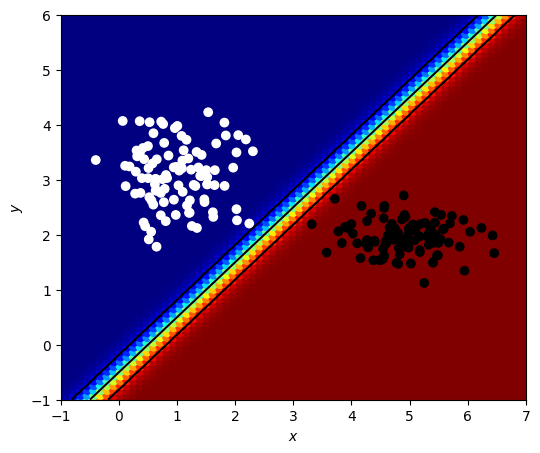

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

#------------------------------------------------------------
# Simulate some data
np.random.seed(0)
mu1 = [1, 3]
cov1 = 0.3 * np.eye(2)

mu2 = [5, 2]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])

# set labels for classification
y = np.random.multivariate_normal([0], np.eye(1), 200)
y[0:100] = 0
y[100:] = 1


#------------------------------------------------------------
# predict the classification probabilities on a grid
xlim = (-1, 7)
ylim = (-1, 6)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71), np.linspace(ylim[0], ylim[1], 81))

# classification boundary 
xG = np.linspace(-1, 8, 100)
slope = 1.0
intercept = -0.5
yG = slope*xG + intercept

# perpendicular distance for points (xx, yy)
perp = (slope*xx - yy + intercept)/np.sqrt(slope**2 + 1)
# classification probability: activation function
scale = 0.1
Z = 1/(1+np.exp(-perp/scale))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(xG, yG, c='w')

ax.contour(xx, yy, Z, [0.1, 0.5, 0.9], colors='k')
ax.scatter(xx, yy, c=Z, cmap=plt.cm.jet)

#ax.scatter(X[:, 0], X[:, 1], c='r', lw=1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

## Note that: 
perpendicular distance from the separation line is 
$$
      perp = a * x + b * y + c
$$
and classification probability ("output") is computed using so-called **activation function**
$$ 
         p(x,y) = \frac{1}{1+ e^{-z}},
$$
where 
$$
          z(x,y) = \frac{perp}{scale}.
$$

### The probability $z(x,y)$ is a non-linear function because of activation function!




## We can generalize this result as:

with $x_1 = x$, $x_2 = y$, $Nd=2$,
$$
          z = \sum_{i=1}^{Nd} w_i * x_i,
$$
where $w_i$ are a set of weights.

### We can estimate these weights by minimizing classifiction loss.

### Furthermore, the output can be multi-dimensional, too. 

## These results generalize to $Nd$ >> 2!

## So, we already have this mathematical model:
    
![](figures/SimpleNN.png)

### And this indeed is a simple model of an Artifical Neural Network!

# Artificial Neural Networks 

Artificial neural networks (ANNs, also shortened to neural networks (NNs) or neural nets) are a branch of machine learning models that are built using principles of neuronal organization discovered by connectionism in the biological neural networks constituting animal brains. 

An artificial neuron receives signals from connected neurons, then processes them and sends a signal to other connected neurons. The "signal" is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs, called the activation function. 

![Neural Network Diagram](figures/fig_neural_network-1.png)

If we consider the simplified network
inputs are passed to the neurons in the
network. Each input is weighted by a value, $w_{ij}$ and the sum of
these weighted inputs is operated on by a **response or activation
function** $f(\theta)$, which transform
the input signal so that it varies between 0 and 1 through the
application of a non-linear response. The output from any neuron is
then given by,

$$
a_j =  f  \left( \sum_i w_{ij} x_i + b_j \right)
$$

where $b_j$ is a **bias** term which determines the input level at which the
neuron becomes activated.

We refer to the neurons between the inputs and the output layers as
the **hidden layers**. 

If the neurons from one layer connect to all
neurons in a subsequent layer we call this a **fully connected layer**.

When the outputs from the neurons only connect to subsequent layers
(i.e. the graph is acyclic) we refer to this as a **feed-forward network** -- this is the most common
structure for a neural network used in classification. 

The final layer in the network is the **output layer**. As with the hidden
layer, an activation function, $g(\theta)$, in the output layer acts
on the weighted sum of its inputs.  

In this figure we have only two output nodes but there can be many more outputs. 
For our example  network the
output from the final neuron, $y_k$, $k=1, 2$, would be given by
(f and g are activation functions: they can be different for each layer)

$$
y_k = g \left( \sum_j   w_{jk} a_j  + b_k \right)  = g\left( \sum_j
  w_{jk}  f \left( \sum_i w_{ij} x_i + b_j\right) + b_k\right)
$$

**Training of the network is simply the learning of the weights and bias values**

### Connection to Dimensionality Reduction

If we connect two such networks, symmetric around the center, the entire information content (modulo model losses) passes through a small number of neurons in the center layer: an effective dimensionality reduction method! 

 

**Deep learning**, an extension of the neural networks that were
popularized in the 1990s. If there a network has more than a single hidden layer, it's "deep" learning. We will talk about deep learning in more detail in the last lecture.

## Why do Neural Networks work so well?  

They are Universal Approximators. This is known as the Universal Approximation Theorem(s). 

Universal approximation theorems imply that neural networks can represent a wide variety of interesting functions with appropriate weights.  To construct the weight, neural networks are trained, and they may converge on the correct weights, or not (i.e. get stuck in a local optimum). 

If the network is too small (for the dimensions of input data) then the universal approximation theorems do not apply, i.e. the networks will not learn. 

Neural networks with an unbounded (non-polynomial) activation function have the universal approximation property. It is not the specific choice of the activation function but rather the multilayer feed-forward architecture itself that gives neural networks the potential of being universal approximators. 

## Activation functions

When the activation function is non-linear, then a two-layer neural network can be proven to be a universal function approximator. The identity activation function does not satisfy this property.


![](figures/ActivationFunctions.png)

## Which activation function to use? 

Unfortunately, there is no solid theoretical background. Based on experience, 
here are a few guidelines:

ReLU activation function should only be used in the hidden layers.

Sigmoid/Logistic and Tanh functions should not be used in hidden layers as they make the model more susceptible to problems during training (due to vanishing gradients, see below).

Swish function is used in neural networks having a depth greater than 40 layers.

The choice of the activation function for output layer depends on the type of prediction problem 
that is being solved:

Regression: Linear Activation Function

Binary Classification: Sigmoid/Logistic Activation Function

Multiclass Classification: Softmax
Multilabel Classification: Sigmoid

The activation function used in hidden layers is typically chosen based on the type of neural network architecture.

# Training the network

Training a neural network is conceptually simple. Given a labelled set
of data and a loss function, we need to optimize
the weights and biases within the network by minimizing some loss function. 

Neural networks are typically trained through empirical risk minimization. This method is based on the idea of optimizing the network's parameters to minimize the difference, or **empirical risk**, between the predicted output and the actual target values in a given dataset.




## Definitions of Train, Validation, and Test Datasets


**Training Dataset:** The sample of data used to fit the model.

**Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

**Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

## Methods for learning weights and bias values


Gradient based methods such as backpropagation (an efficient application of the Leibniz chain rule) are usually used to estimate the parameters of the network. During the training phase, ANNs learn from labeled training data by iteratively updating their parameters to minimize a defined loss function. This method allows the network to generalize to unseen data.



**Mini-batch:** Optimization of the weights uses a standard gradient descent technique. If the loss function can be expressed in terms of a sum over subsets of the training data (e.g., as is the case for the
L2 norm) the training can be undertaken either for the dataset as a
whole, for subsets of the data (batch learning), or for individual
entries (on-line or stochastic learning). 

**Batch gradient descent** looks at all points in the data and calculates the average gradients before updating the weights in the model. 

**Stochastic gradient descent** takes a single point and calculates the gradients and then updates the model (and then repeats). 

**Mini-batch gradient descent** takes a subset of the training data and  calculates the average gradients and  updates the model  (and then repeats over all mini-batches).

### Batch normalization

Batch normalization scales the activations from a layer to have zero mean and unit variance (the input data are assumed normalized). In practice, the mean and the standard deviation are learned by the network and the activations multiplied/added by these parameters. 

Batch normalization provides a degree of regularization and allows for faster learning rates as the outputs are constrained to 0-1 (i.e. you dont get large excursions in the weights of subsequent layers in a network that need to be reoptimized/trained). 

The normalization is applied to mini-batches of training data (as opposed to using the full training sample).

## Training challenges

There are two challenges that might be encountered when training your deep neural networks:

**Vanishing Gradients**
Like the sigmoid function, certain activation functions squish an ample input space into a small output space between 0 and 1. 
Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small. For shallow networks with only a few layers that use these activations, this isn’t a big problem. 
However, when more layers are used, it can cause the gradient to be too small for training to work effectively. 

**Exploding Gradients**
are problems where significant error gradients accumulate and result in very large updates to neural network model weights during training. 
An unstable network can result when there are exploding gradients, and the learning cannot be completed. 
The values of the weights can also become so large as to overflow and result in something called NaN values. 

# Let's now try to construct a simple Neural Network and apply it to a Classification problem

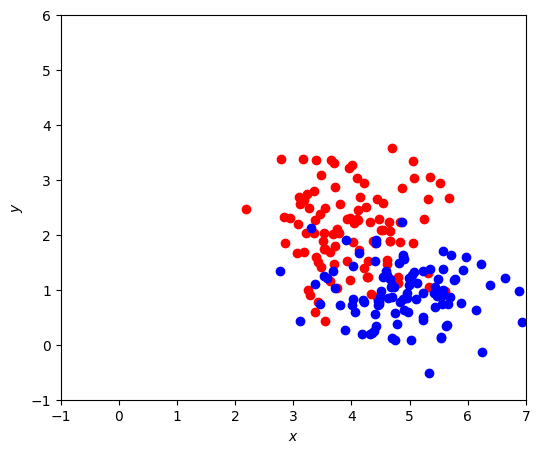

In [3]:
# Simulate more data, with more overlap
np.random.seed(0)
mu1 = [4, 2]
cov1 = 0.5 * np.eye(2)
mu2 = [5, 1]
cov2 = np.eye(2) * np.array([0.7, 0.3])

Xo = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])

# set labels for classification
yo = np.random.multivariate_normal([0], np.eye(1), 200)
yo[0:100] = 0
yo[100:] = 1

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.scatter(Xo[0:100, 0], Xo[0:100, 1], c='r')
ax.scatter(Xo[100:200, 0], Xo[100:200, 1], c='b')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

## First, let's look at a very simple implementation of a single-layer weight optimization

In [4]:
def train(X, y, n_hidden, learning_rate, n_iter):

    def sigmoid(z):
        return 1/(1+np.exp(-z))
    
    def sigmoid_derivative(z):
        return sigmoid(z)*(1-sigmoid(z)) 

    ## 0. input shape
    m, n_input = X.shape

    ## 1. random initialize weights and biases
    w1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    w2 = np.random.randn(n_hidden, 1)
    b2 = np.zeros((1, 1))

    ## 2. in each iteration, feed all layers with the latest weights and biases
    for i in range(n_iter + 1):

        z2 = np.dot(X, w1) + b1
        a2 = sigmoid(z2)

        z3 = np.dot(a2, w2) + b2
        a3 = z3

        # mistakes we made (squared and summed, this is loss function)
        dz3 = a3 - y

        # for updating the second layer
        dw2 = np.dot(a2.T, dz3)
        db2 = np.sum(dz3, axis=0, keepdims=True)
        
        # derivatives in the second layer 
        dz2 = np.dot(dz3, w2.T) * sigmoid_derivative(z2)
        # and for updating the first layer
        dw1 = np.dot(X.T, dz2)
        db1 = np.sum(dz2, axis=0)

        ## 3. update weights and biases with the above gradients
        w1 -= learning_rate * dw1 / m
        w2 -= learning_rate * dw2 / m
        b1 -= learning_rate * db1 / m
        b2 -= learning_rate * db2 / m

        # show progress
        if i % 100 == 0:
            print("Epoch", i, "loss: ", np.mean(np.square(dz3)))

    model = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}
    return model

In [5]:
## data without overlap 
n_hidden=1
learning_rate = 1.0
n_iter = 1000
model = train(X, y, n_hidden, learning_rate, n_iter)
model

Epoch 0 loss:  0.6068645155312411
Epoch 100 loss:  0.004436607286933918
Epoch 200 loss:  0.0036119154478295107
Epoch 300 loss:  0.003078797000750809
Epoch 400 loss:  0.0027050213954051827
Epoch 500 loss:  0.0024271500943139645
Epoch 600 loss:  0.002211428400453923
Epoch 700 loss:  0.00203834044986268
Epoch 800 loss:  0.0018958329692080112
Epoch 900 loss:  0.0017760574351044977
Epoch 1000 loss:  0.001673678637613991


{'w1': array([[-1.90589015],
        [ 1.98161914]]),
 'b1': array([[0.66450229]]),
 'w2': array([[-1.03600922]]),
 'b2': array([[1.01657525]])}

In [6]:
## data with overlap 
n_hidden=1
learning_rate = 1.0
n_iter = 1000
model = train(Xo, yo, n_hidden, learning_rate, n_iter)
model

Epoch 0 loss:  0.8242219735455931
Epoch 100 loss:  0.10684744451737821
Epoch 200 loss:  0.10616399433283087
Epoch 300 loss:  0.10465525141161257
Epoch 400 loss:  0.10437295097707615
Epoch 500 loss:  0.10414621353318462
Epoch 600 loss:  0.10395864717953252
Epoch 700 loss:  0.10379982822384683
Epoch 800 loss:  0.10366287786725568
Epoch 900 loss:  0.10354310120762886
Epoch 1000 loss:  0.10343719173365322


{'w1': array([[ 0.9431351 ],
        [-2.28062916]]),
 'b1': array([[-0.83744327]]),
 'w2': array([[1.08610776]]),
 'b2': array([[-0.04406927]])}

## and now let's use a more developed, but still simple, implementation

In [7]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        # self.weights = np.array([[.50], [.50], [.50]])
        self.weights = np.array([[.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> sigmoid S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            # wrong? return x * (1 - x)
            return self.sigmoid(x) * (1-self.sigmoid(x))
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net (default, with 25,000 iterations)
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

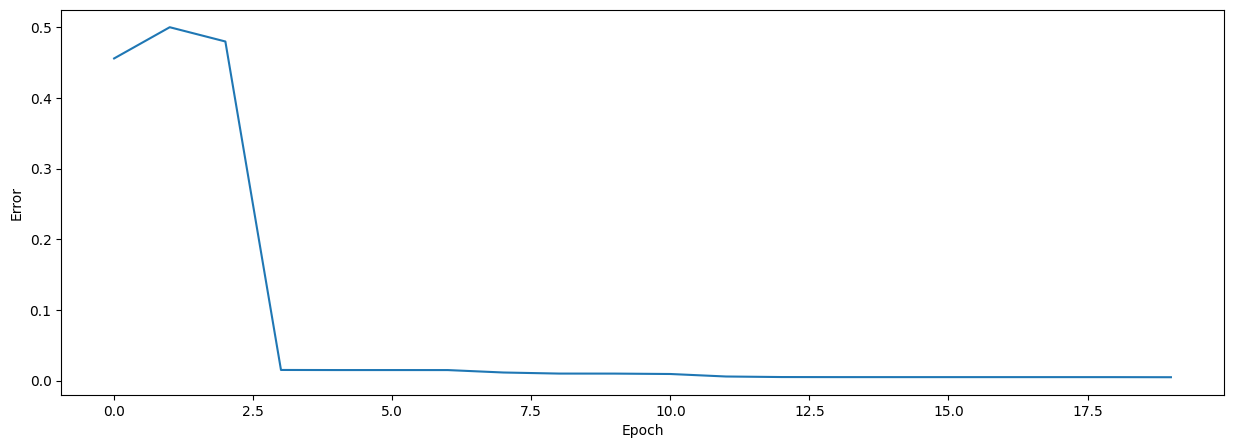

In [8]:
## without overlap
# create neural network   
NN = NeuralNetwork(X, y)
# train neural network
NN.train(epochs=20)

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [9]:
# predictions in the entire x-y plane
predGrid = NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = predGrid[:, 0].reshape(xx.shape)
# predictions for data 
predData = NN.predict(X)
predLabel = np.where(predData > 0.5, 1, 0)
badX = X[predLabel[:,0] != y[:,0]]
print('misclassified', len(badX), 'data points')

misclassified 1 data points


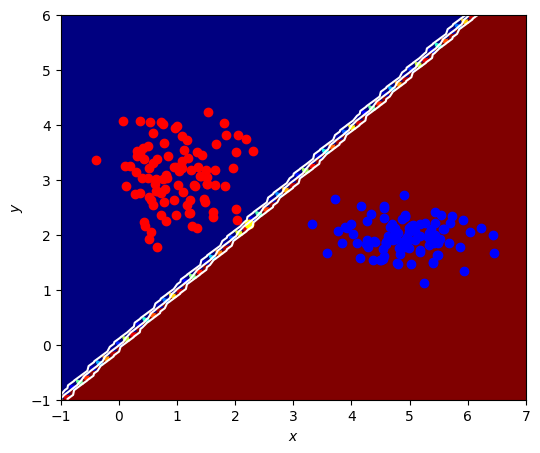

In [10]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.contour(xx, yy, Z, [0.01, 0.5, 0.99], colors='white')
ax.scatter(xx, yy, c=predGrid, cmap=plt.cm.jet)

ax.scatter(X[0:100, 0], X[0:100, 1], c='r')
ax.scatter(X[100:200, 0], X[100:200, 1], c='b')

ax.scatter(badX[:, 0], badX[:, 1], c='yellow')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

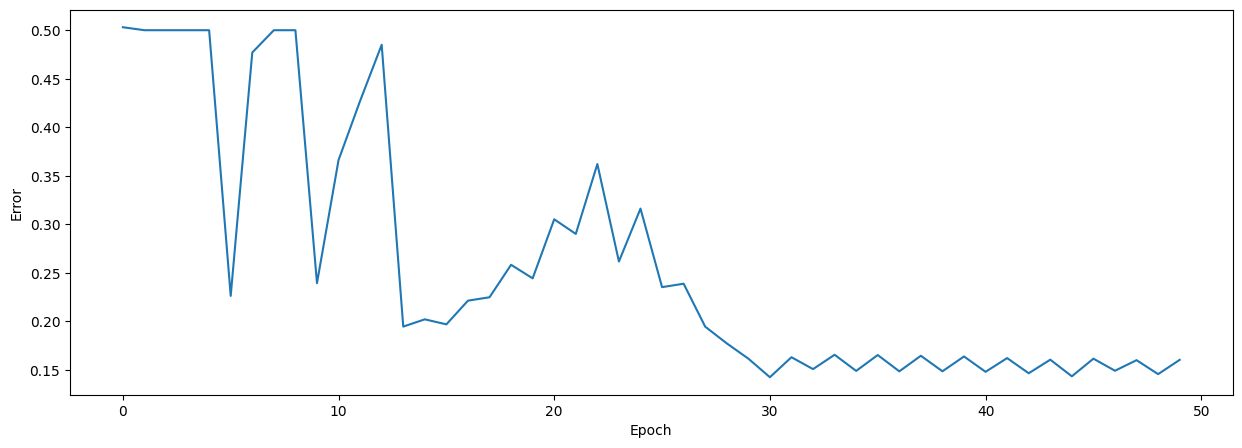

In [11]:
## with overlap
# create neural network   
NNo = NeuralNetwork(Xo, yo)
# train neural network
NNo.train(epochs=50)

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NNo.epoch_list, NNo.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [12]:
predGrido = NNo.predict(np.c_[xx.ravel(), yy.ravel()])
Zo = predGrido[:, 0].reshape(xx.shape)
# predictions for data 
predDatao = NNo.predict(Xo)
predLabelo = np.where(predDatao > 0.5, 1, 0)
badXo = Xo[predLabelo[:,0] != yo[:,0]]
print('misclassified', len(badXo), 'data points')

misclassified 30 data points


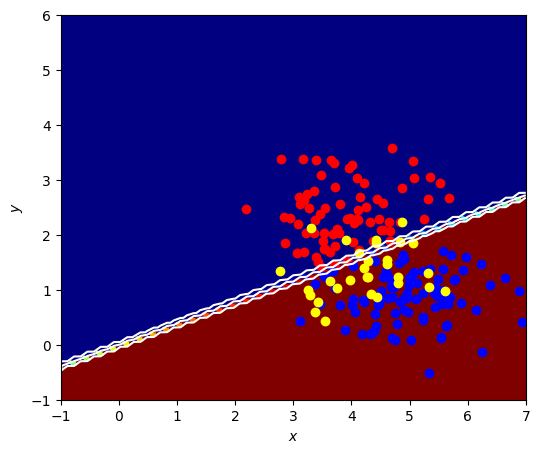

In [13]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.contour(xx, yy, Zo, [0.01, 0.5, 0.99], colors='white')
ax.scatter(xx, yy, c=predGrido, cmap=plt.cm.jet)

ax.scatter(Xo[0:100, 0], Xo[0:100, 1], c='r')
ax.scatter(Xo[100:200, 0], Xo[100:200, 1], c='b')

ax.scatter(badXo[:, 0], badXo[:, 1], c='yellow')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [14]:
## let's generate an independent test sample and recompute classification accuracy
# Simulate more data, with more overlap
np.random.seed(10)  # must change random seed!!! 
mu1 = [4, 1]
cov1 = 0.5 * np.eye(2)
mu2 = [5, 0]
cov2 = np.eye(2) * np.array([0.7, 0.3])

Xo2 = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])

# set labels for classification
yo2 = np.random.multivariate_normal([0], np.eye(1), 200)
yo2[0:100] = 0
yo2[100:] = 1

In [15]:
# predictions for data 
predDatao2 = NNo.predict(Xo2)
predLabelo2 = np.where(predDatao2 > 0.5, 1, 0)
badXo2 = Xo2[predLabelo2[:,0] != yo2[:,0]]
print('misclassified', len(badXo2), 'data points in the test sample')

misclassified 81 data points in the test sample


### general conclusion: the performance is worse for a test sample than for the training sample
 